<a href="https://colab.research.google.com/github/knag7/Week_0/blob/master/DATA_301_Lab_1A_Kevin_Nagpal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**1. I think that approximately 25% of the values will have a first digit of 1 just because 1 is the smallest value for a digit and so more values are likely to have 1. Along the same lines, I think that approximately 5% will have a first digit of 9 because it the largest value for a digit and so it is less likely that values will have 9 as a first digit.**

**2. For both, I believe it will be approximately 11.11% because the expected values are 1/9 = 0.1111, and the last digit is more randomly distributed compared to the first digit.**

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [10]:
# Importing Packages
import pandas as pd
from matplotlib import pyplot as plt # For plots

In [11]:
data_dir = "http://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(data_dir + "sp500.csv")

# Observing First 5 Observations
df_sp500.head()

,date,Name,open,close,volume
0,2018-02-01,AAL,$54.00,$53.88,3623078
1,2018-02-01,AAPL,$167.16,$167.78,47230787
2,2018-02-01,AAP,$116.24,$117.29,760629
3,2018-02-01,ABBV,$112.24,$116.34,9943452
4,2018-02-01,ABC,$97.74,$99.29,2786798


In [12]:
# Setting Company Name as Index
df_sp500.set_index(["Name"], inplace=True)

# Displaying Dataframe
df_sp500

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


**The unit of observation in this data set is a large company that is publicly traded on the NYSE or NASDAQ. I used "Name" as the index because it seemed natural to do so.**

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

In [13]:
# Extracting Volumn column and converting values to a String
volume = df_sp500.volume.astype(str)

# Extracting First Character of each String
first_digits = volume.str[0]

# Finding Frequency
first_digits_count = first_digits.value_counts()

first_digits_count

1    165
2     93
3     59
4     43
5     41
6     36
7     25
8     22
9     21
Name: volume, dtype: int64

In [14]:
# Converting Counts to Probabilities
first_digits_probs = first_digits.value_counts(normalize=True)
first_digits_probs

1    0.326733
2    0.184158
3    0.116832
4    0.085149
5    0.081188
6    0.071287
7    0.049505
8    0.043564
9    0.041584
Name: volume, dtype: float64

Text(0, 0.5, 'Frequency')

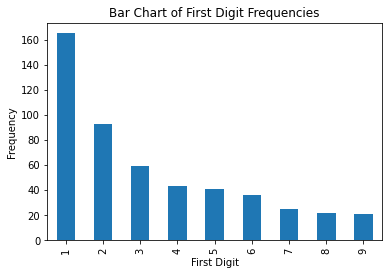

In [15]:
# Creating Distribution Plot of Frequencies
first_digits_count.plot.bar()
plt.title("Bar Chart of First Digit Frequencies")
plt.xlabel("First Digit")
plt.ylabel("Frequency")

Text(0, 0.5, 'Probability')

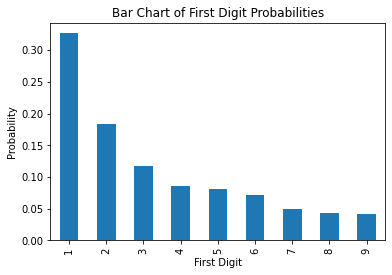

In [16]:
# Creating Distribution Plot of Probabilities
first_digits_probs.plot.bar()
plt.title("Bar Chart of First Digit Probabilities")
plt.xlabel("First Digit")
plt.ylabel("Probability")

**This is somewhat similar to what I predicted in Question 0 because the probability of 1 being the first digit is about 32.7% and I predicted 25%, and the probability of 1 being the first digit is about 4.2% and I predicted 5%. However, I did not think that the distribution would be so heavily skewed right as it is.**

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

In [17]:
# Extracting Last Character of each String
last_digits = volume.str[-1]

# Finding Frequency
last_digits_count = last_digits.value_counts()

last_digits_count

8    56
2    56
9    53
1    53
7    52
0    52
6    51
3    48
5    44
4    40
Name: volume, dtype: int64

**This is very similar to what I predicted in Question 0, because both probability of 1 and 9 being the first digit is each about 10.5% and I predicted 11.11%. The distribution isn't the same across all of the other digits, but with real data, deviations from expected values are to be expected.**

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

In [18]:
# Cleaning Closing Price variable b/c contains "$"

close_price = df_sp500.close

# Removing "$" and Commas
new_close = close_price.str.replace("$", "", regex=False)
new_close = new_close.str.replace(",", "", regex=False)
new_close

Name
AAL      53.88
AAPL    167.78
AAP     117.29
ABBV    116.34
ABC      99.29
         ...  
XYL      74.84
YUM      83.98
ZBH     128.19
ZION     54.98
ZTS      77.82
Name: close, Length: 505, dtype: object

In [19]:
# Converting to Floats
close_float = new_close.astype(float)

# Obtaining First Digit and Counts
first_close_digit = new_close.str[0]
first_close_digit.value_counts()

1    171
2     55
3     52
6     48
4     43
7     43
5     39
8     28
9     26
Name: close, dtype: int64

In [20]:
# Converting Counts to Probabilities
close_first_digits_probs = first_close_digit.value_counts(normalize=True)
close_first_digits_probs

1    0.338614
2    0.108911
3    0.102970
6    0.095050
4    0.085149
7    0.085149
5    0.077228
8    0.055446
9    0.051485
Name: close, dtype: float64

Text(0, 0.5, 'Probability')

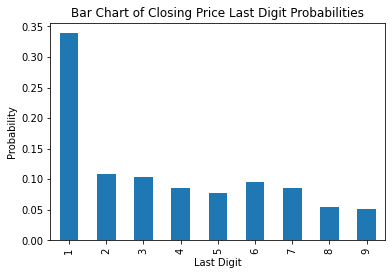

In [21]:
# Creating Histogram of Probabilites
close_first_digits_probs.sort_index().plot.bar()
plt.title("Bar Chart of Closing Price Last Digit Probabilities")
plt.xlabel("Last Digit")
plt.ylabel("Probability")

**This confirms that the volume column was not just a fluke, and that although the distribution is much more extremely right-skewed when looking at closing price, it still holds for the most part. The probability of the first digit being 1 is slightly higher compared to for volume, as it's 33.9% versus 32.7%, respectively and this is also the case for the first digit being 9, as it's 5.1% vs. 4.2%.**